In [71]:
%matplotlib notebook

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [73]:
path1 = 'GM.csv'
path2 = 'MotorvehicleIncidents (1).csv'

In [74]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

In [75]:
df1 = df1[['Date', 'Close']]
df1.head()

,Date,Close
0,2010-11-18,34.189999
1,2010-11-19,34.259998
2,2010-11-22,34.080002
3,2010-11-23,33.250000
4,2010-11-24,33.480000


In [76]:
df2 = df2.groupby('DateOfIncident')

In [77]:
df3 = df2.count()

In [78]:
df3 = df3.rename(columns={'Unnamed: 0' : 'Count'})

In [79]:
df3 = df3['Count']

In [80]:
df3 = df3.reset_index()
df3 = df3.rename(columns={'DateOfIncident' : 'Date'})
df3 = pd.DataFrame(df3)
df3.head()

,Date,Count
0,2010-09-01,15
1,2010-09-02,9
2,2010-09-03,11
3,2010-09-04,4
4,2010-09-05,4


In [81]:
df4 = df1.merge(df3, on='Date')

In [82]:
df4.head()

,Date,Close,Count
0,2010-11-18,34.189999,8
1,2010-11-19,34.259998,13
2,2010-11-22,34.080002,9
3,2010-11-23,33.250000,1
4,2010-11-24,33.480000,11


<IPython.core.display.Javascript object>


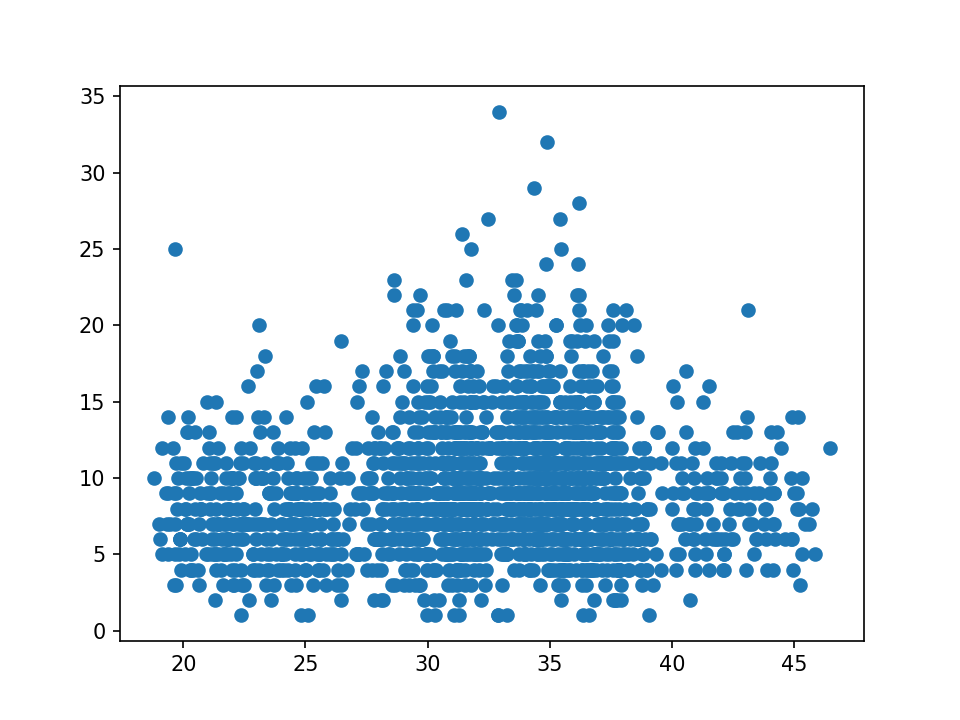

In [83]:
plt.scatter(df4['Close'], df4['Count'])

<IPython.core.display.Javascript object>


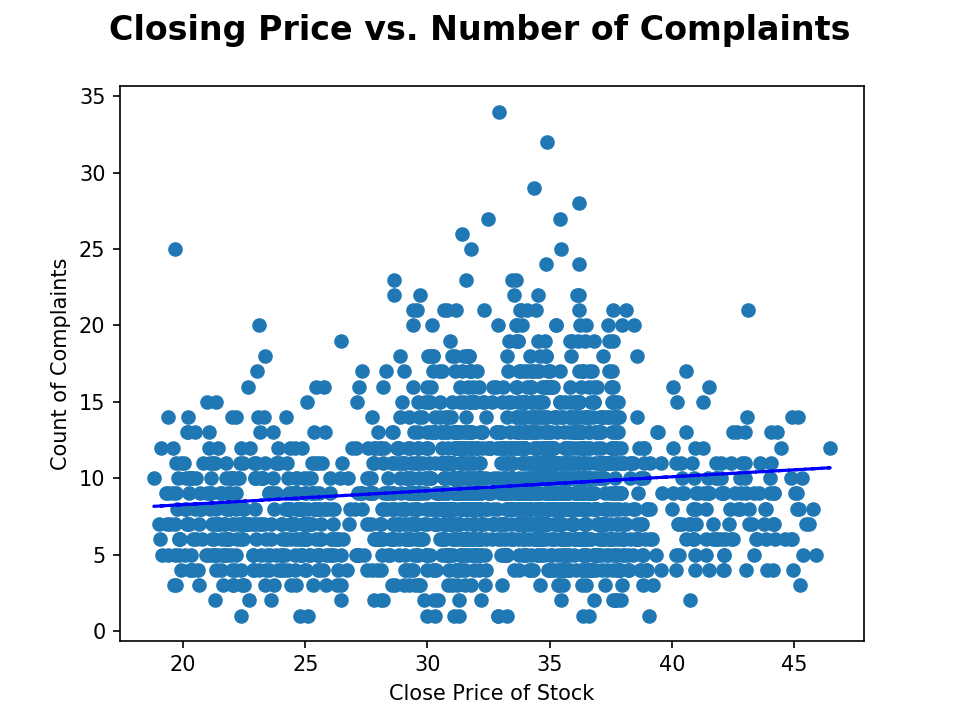

In [90]:
dm_slope, dm_int, dm_r, dm_p, dm_std_err = linregress(df4['Close'], df4['Count'])
dm_fit = dm_slope * df4['Close'] + dm_int


fig2, ay = plt.subplots()

fig2.suptitle("Closing Price vs. Number of Complaints", fontsize=16, fontweight="bold")

#ax.set_xlim(0, (df_main['McDonalds Count'].max())
#ax.set_ylim(0, df_main['Alcohol Mortality Rate'].max())

ay.set_xlabel("Close Price of Stock")
ay.set_ylabel("Count of Complaints")

ay.plot(df4['Close'], df4['Count'], linewidth=0, marker='o')
ay.plot(df4['Close'], dm_fit, 'b--')


plt.savefig('PriceVSComplaints.png')
plt.show()

In [88]:
linregress(df4['Close'], df4['Count'])

LinregressResult(slope=0.09125021785126225, intercept=6.438162094228204, rvalue=0.12080152290803792, pvalue=1.6216571540899393e-07, stderr=0.017353902832034557)